In [1]:
import pandas as pd
import numpy as np

In [2]:
from sqlalchemy import create_engine, text

In [3]:
import cx_Oracle
import os
os.putenv(' NLS_LANG', '.UTF8')

In [4]:
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns


In [5]:
pd.options.plotting.backend = "plotly"


In [6]:
dsn = cx_Oracle.makedsn('192.168.1.5', '1521', service_name = 'ORA11')
con = cx_Oracle.connect('dbam', 'dbamkass', dsn = dsn, encoding="UTF-8")
cur = con.cursor()

In [7]:
sql_k200 = " select 일자, 종목코드2 종목코드, 종목명_국문 종목명, 당일가격, 지수내비중, 상장주식수, 유동비율, \
            지수주식수, 지수시가총액 \
             from KASS1.TH068 \
             where 익일적용여부 ='NXT' \
             and ISIN = 'KRD020020016' \
             order by 지수내비중 desc "

cur.execute(sql_k200)
k200_df = pd.DataFrame(cur.fetchall(), columns = [x[0] for x in cur.description])

k200_df['일자']=pd.to_datetime(k200_df['일자'], format ='%Y%m%d')
k200_df.set_index(['일자', '종목코드'], inplace=True)
k200_df.index.names=['Dates', 'Symbol']
k200_df.columns=['name', 'close', 'idx_weight', 'num_shares', 'float_rate', 'idx_num_shares', 'idx_cap']
k200_df=k200_df.sort_index(0)

<ipython-input-7-c380e1fc735c>:15: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  k200_df=k200_df.sort_index(0)


In [8]:
host = '192.168.1.27'
port = '3306'
db_name = 'quantdb_maria'
username = 'quantdb'
password = 'QuantDb2023!'

engine = create_engine("mysql+pymysql://" + username + ":" + password + "@" + host + ":" + port + "/" + db_name)
conn=engine.connect()

In [9]:
period1='2023-01-01'
period2='2023-12-28'

In [10]:
query_SSC=f"select * from SSC_table_Bak where Dates>='{period1}' and Dates<='{period2}'"
data_SSC=pd.read_sql(query_SSC, conn)

In [ ]:
data_SSC.set_index(['Dates','Symbol'], inplace=True)

In [11]:
data_SSC.columns

Index(['Dates', 'Symbol', 'Name', 'MNGT', 'ClosePrc', 'OpenPrc', 'HighPrc',
       'LowPrc', 'AdjPrc', 'AdjPrc2', 'AdjPrc_High_20D', 'AdjPrc_Low_20D',
       'AdjPrc_High_60D', 'AdjPrc_Low_60D', 'AdjPrc_High_120D',
       'AdjPrc_Low_120D', 'AdjPrc_High_52W', 'AdjPrc_Low_52W', 'ListedShares',
       'ForeignStake', 'TradeStop', 'MktCap_Comm_Pref', 'MktCapCom', 'MktCap',
       'Volume', 'Volume_Avg_20D', 'Volume_Avg_60D', 'Volume_Avg_120D',
       'Volume_Avg_52W', 'Amt_Avg_20D', 'Amt_Avg_60D', 'Amt_Avg_120D',
       'Amt_Avg_52W', 'Vol_20D', 'Vol_120D'],
      dtype='object')

In [12]:
query_COM=f"select * from COM_table_Bak where Dates>='{period1}' and Dates<='{period2}'"
data_COM=pd.read_sql(query_COM, conn)

In [13]:
data_COM.set_index(['Dates','Symbol'], inplace=True)

In [14]:
data_COM.columns

Index(['Name', 'KC_Industry', 'FG_IndustryGroup27', 'FG_Sector_Idx',
       'FG_IndustryGroup_Idx', 'FG_Industry_Idx', 'AuditOpinion', 'Caution',
       'KSECapSize', 'KLCAIndustry', 'Market', 'KOSPI200YN', 'FiscalMonth'],
      dtype='object')

In [15]:
data_COM_nodup=data_COM.loc[~data_COM.index.duplicated(keep='first')].copy()
data_SSC_nodup=data_SSC.loc[~data_SSC.index.duplicated(keep='first')].copy()
# data_CIA_nodup=data_CIA.loc[~data_CIA.index.duplicated(keep='first')].copy()
# data_IFRS_nodup=data_IFRS.loc[~data_IFRS.index.duplicated(keep='first')].copy()
# data_CON_nodup=data_CON.loc[~data_CON.index.duplicated(keep='first')].copy()

In [16]:
k200comp=data_COM_nodup['KOSPI200YN'].unstack()

In [ ]:
data_SSC_nodup.set_index(['Dates', 'Symbol'], inplace=True)

In [17]:
query_idx=f"select * from krx_idx"
krx_idx=pd.read_sql(query_idx, conn)

In [18]:
krx_idx.columns

Index(['Dates', '코스피', '코스피 200', '코스피 100', '코스피 50', '코스닥 150', '코스닥',
       '코스피 200 동일가중', '코스피 대형주', '코스피 중형주', '코스피 소형주', '코스피 음식료품',
       '코스피 섬유,의복', '코스피 종이,목재', '코스피 화학', '코스피 의약품', '코스피 비금속광물', '코스피 철강및금속',
       '코스피 기계', '코스피 전기,전자', '코스피 의료정밀', '코스피 운수장비', '코스피 유통업', '코스피 전기가스업',
       '코스피 건설업', '코스피 운수창고', '코스피 통신업', '코스피 금융업', '코스피 증권', '코스피 보험',
       '코스피 서비스업', '코스피 제조업', '코스피 고배당 50 TR', '코스피 배당성장 50 TR', '코스피 우선주지수',
       '코스피 200 총수익지수', '코스피 200 중소형주', '코스피 200 건설 TR', '코스피 200 중공업 TR',
       '코스피 200 철강소재 TR', '코스피 200 에너지화학 TR', '코스피 200 정보기술 TR',
       '코스피 200 금융 TR', '코스피 200 생활소비재 TR', '코스피 200 경기소비재 TR',
       '코스피 200 산업재 TR', '코스피 200 헬스케어 TR', '코스피 200 커뮤니케이션서비스 TR',
       '코스피 200 ESG 지수', '에너지(KOSPI)', '화학(KOSPI)', '금속및광물(KOSPI)',
       '기타 소재(KOSPI)', '건설(KOSPI)', '조선(KOSPI)', '기타자본재(KOSPI)',
       '상업서비스(KOSPI)', '운송(KOSPI)', '자동차및부품(KOSPI)', '내구소비재및의류(KOSPI)',
       '소비자서비스(KOSPI)', '미디어(KOSPI)', '유통(KOSPI)', '음식료및담배(KOSPI)',
      

In [19]:
krx_idx.set_index('Dates', inplace=True)
krx_idx=krx_idx.loc[:period2]

In [20]:
krx_idx

,코스피,코스피 200,코스피 100,코스피 50,코스닥 150,코스닥,코스피 200 동일가중,코스피 대형주,코스피 중형주,코스피 소형주,...,은행(KOSPI),보험(KOSPI),증권(KOSPI),기타금융(KOSPI),소프트웨어(KOSPI),하드웨어(KOSPI),반도체(KOSPI),디스플레이(KOSPI),통신서비스(KOSPI),유틸리티(KOSPI)
Dates,,,,,,,,,,,,,,,,,,,,,
2000-01-04,1059.04,133.66,NaN,NaN,NaN,2660.00,NaN,1000.00,1000.00,1000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,986.31,123.86,922.14,918.40,NaN,2629.50,NaN,923.61,970.47,992.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,960.79,120.80,900.82,898.72,NaN,2475.20,NaN,904.64,931.49,962.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,948.65,119.10,887.78,883.90,NaN,2276.60,NaN,890.32,938.66,966.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,987.24,124.11,927.12,924.83,NaN,2310.80,NaN,928.70,952.01,975.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,2600.02,348.78,2629.80,2414.63,1387.48,859.44,2170.02,2580.93,2790.83,2294.27,...,2569.39,10537.4,2364.39,47.57,3563.18,3165.40,24823.5,202.73,725.73,864.94
2023-12-22,2599.51,349.15,2632.02,2415.33,1369.78,854.62,2164.24,2582.25,2788.16,2297.53,...,2551.26,10493.1,2344.57,47.72,3507.86,3158.75,25067.3,206.39,722.47,864.53
2023-12-26,2602.59,350.43,2641.55,2423.71,1357.08,848.34,2167.29,2588.31,2789.53,2287.33,...,2564.05,10650.6,2390.14,48.08,3509.62,3126.07,25261.1,204.06,723.80,863.54


In [21]:
bm_ret=krx_idx[['코스피 200', '코스피 200 동일가중']].pct_change()
large_cap=krx_idx[['코스피 100', '코스피 50']].copy()

In [23]:
prc=data_SSC_nodup['AdjPrc']
prc=prc.loc[~prc.index.duplicated(keep='first')].copy()
prc=prc.unstack()
prc=prc.astype(float)
ret=prc.pct_change()

In [24]:
eom=['2023-02-28', 
     '2023-03-31', 
     '2023-04-28', 
     '2023-05-31', 
     '2023-06-30', 
     '2023-07-31', 
     '2023-08-31', 
     '2023-09-27', 
     '2023-10-31', 
     '2023-11-29', 
     '2023-12-28']

In [25]:
data_path='../data/output/weight/'
mlq_w=pd.read_excel(data_path + 'monthly_port.xlsx', index_col=0)

In [26]:
mlq_w

,code,weights,name
dates,,,
2023-02-28,A001040,0.009461,CJ
2023-02-28,A096770,0.009461,SK이노베이션
2023-02-28,A006260,0.009461,LS
2023-02-28,A011790,0.009461,SKC
2023-02-28,A016380,0.009461,KG스틸
...,...,...,...
2023-12-28,A001680,0.009257,대상
2023-12-28,A032830,0.009257,삼성생명
2023-12-28,A105560,0.009257,KB금융


In [27]:
mlq_w=mlq_w[mlq_w.index.isin(eom)]
mlq_w=mlq_w[['code', 'weights']].pivot_table(index='dates', columns='code')
mlq_w.reset_index(inplace=True)


In [28]:
eom

['2023-02-28',
 '2023-03-31',
 '2023-04-28',
 '2023-05-31',
 '2023-06-30',
 '2023-07-31',
 '2023-08-31',
 '2023-09-27',
 '2023-10-31',
 '2023-11-29',
 '2023-12-28']

In [29]:
mlq_w

dates   weights                                                    \
code              A000080   A000120   A000150   A000210   A000240   A000270   
0    2023-02-28       NaN  0.009461  0.009461       NaN       NaN       NaN   
1    2023-03-31       NaN       NaN       NaN       NaN       NaN  0.011639   
2    2023-04-28       NaN       NaN  0.009329       NaN       NaN       NaN   
3    2023-05-31       NaN       NaN       NaN       NaN       NaN       NaN   
4    2023-06-30       NaN       NaN  0.009192       NaN       NaN  0.009192   
5    2023-07-31       NaN  0.009419       NaN       NaN       NaN       NaN   
6    2023-08-31  0.009463  0.009463       NaN  0.009463  0.009463  0.009463   
7    2023-09-27  0.009396  0.009396       NaN  0.009396  0.009396  0.009396   
8    2023-10-31  0.009396  0.009396  0.009396  0.009396  0.009396       NaN   
9    2023-11-29       NaN  0.009292       NaN       NaN       NaN  0.009292   
10   2023-12-28       NaN  0.009257  0.009257  0.009257       NaN       NaN   

                                    ...                                \
code   A000660   A000670   A000720  ...   A323410   A326030   A329180   
0          NaN       NaN  0.009461  ...       NaN  0.009461  0.009461   
1     0.011639       NaN       NaN  ...       NaN       NaN       NaN   
2     0.009329  0.009329       NaN  ...  0.009329  0.009329  0.009329   
3          NaN  0.009372       NaN  ...       NaN  0.009372  0.009372   
4          NaN  0.009192       NaN  ...  0.009192  0.009192  0.009192   
5     0.009419  0.009419       NaN  ...  0.009419  0.009419  0.009419   
6          NaN       NaN       NaN  ...       NaN       NaN       NaN   
7          NaN       NaN       NaN  ...       NaN       NaN       NaN   
8          NaN       NaN       NaN  ...       NaN       NaN       NaN   
9          NaN       NaN  0.009292  ...       NaN       NaN       NaN   
10         NaN       NaN  0.009257  ...       NaN       NaN       NaN   

                                                                            
code   A336260   A352820   A373220   A375500   A381970   A383220   A402340  
0     0.009461       NaN       NaN       NaN       NaN       NaN       NaN  
1          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
2     0.009329       NaN       NaN       NaN       NaN       NaN       NaN  
3     0.009372       NaN       NaN       NaN       NaN       NaN       NaN  
4          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
5          NaN  0.009419  0.009419       NaN       NaN       NaN  0.009419  
6          NaN       NaN       NaN  0.009463       NaN  0.009463       NaN  
7          NaN       NaN       NaN  0.009396  0.009396  0.009396       NaN  
8          NaN       NaN       NaN  0.009396  0.009396  0.009396       NaN  
9          NaN  0.009292       NaN  0.009292       NaN       NaN       NaN  
10         NaN       NaN  0.009257       NaN       NaN  0.009257       NaN  

[11 rows x 197 columns]

In [30]:
mlq_w['new_dates']=eom
mlq_w.set_index('new_dates', inplace=True)
mlq_w.drop(columns=['dates'], inplace=True)

mlq_w.columns=mlq_w.columns.get_level_values(1)
mlq_w.index=pd.to_datetime(mlq_w.index)
mlq_w=mlq_w.fillna(0)

<ipython-input-30-62b76c4750d8>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  mlq_w.drop(columns=['dates'], inplace=True)


In [31]:
mlq_w.sum(1)

new_dates
2023-02-28    1.0
2023-03-31    1.0
2023-04-28    1.0
2023-05-31    1.0
2023-06-30    1.0
2023-07-31    1.0
2023-08-31    1.0
2023-09-27    1.0
2023-10-31    1.0
2023-11-29    1.0
2023-12-28    1.0
dtype: float64

In [32]:
daily_w=pd.DataFrame(None, columns=mlq_w.columns, index=ret.loc[mlq_w.index[0]:].index)
daily_w.loc[mlq_w.index]=mlq_w

daily_w.fillna(method='ffill', inplace=True)
daily_w=daily_w.shift(1)

In [33]:
mlq_w.index

DatetimeIndex(['2023-02-28', '2023-03-31', '2023-04-28', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-27',
               '2023-10-31', '2023-11-29', '2023-12-28'],
              dtype='datetime64[ns]', name='new_dates', freq=None)

In [34]:
mlq_ret=daily_w*ret.loc[daily_w.index]
mlq_idx_ret=mlq_ret.sum(1)

In [35]:
sys.path.append('../py')
import data_processing as proc
import utils
import performance as perf

In [68]:
idx_ret, idx_ret_cost, idx_cum_ret, idx_cum_retcost = perf.return_index(prc.loc[daily_w.index[0]:], 
                                                                        daily_w.fillna(0),
                                                                        cost=0.003)

In [37]:
model_ret=pd.read_excel(data_path+'ret_strat.xlsx', index_col=0)

In [38]:
model_ret

,mfm,mfm_emp,dynamic
2023-01-02,-0.008779,-0.007292,-0.006716
2023-01-03,0.001826,-0.000216,-0.000291
2023-01-04,0.019695,0.015465,0.018791
2023-01-05,0.001663,0.004127,0.004887
2023-01-06,0.014489,0.009787,0.012526
...,...,...,...
2023-12-21,-0.003519,-0.004880,-0.002546
2023-12-22,0.001621,0.000873,0.006398
2023-12-26,0.005203,-0.001400,0.002735
2023-12-27,-0.001712,0.013527,0.010464


In [39]:
final_ret=pd.concat([model_ret['dynamic'], 
                     idx_ret_cost, 
                     bm_ret], axis=1)


In [40]:
final_ret=final_ret.dropna()

In [41]:
final_ret.columns=['dynamic', 'mlq', 'k200', 'k200ew'] # 'mfm', 'mfm_emp', 

In [42]:
final_ret

,dynamic,mlq,k200,k200ew
2023-02-28,0.002677,0.000000,0.002739,0.001820
2023-03-02,0.005291,0.005755,0.004638,0.008460
2023-03-03,0.001132,-0.003856,0.000316,0.002391
2023-03-06,0.011246,0.004580,0.014477,0.001484
2023-03-07,-0.000464,-0.004881,-0.003552,-0.000221
...,...,...,...,...
2023-12-21,-0.002546,-0.002241,-0.003799,-0.005846
2023-12-22,0.006398,0.003814,0.001061,-0.002664
2023-12-26,0.002735,0.005770,0.003666,0.001409
2023-12-27,0.010464,-0.006902,0.005793,-0.007479


In [43]:
final_cumret=(1+final_ret).cumprod()-1

In [44]:
fig, ax1=plt.subplots(figsize=(12, 8))


for col in final_cumret.columns:
    plt.plot(final_cumret.index, final_cumret[col], label=col)
    plt.legend()
    # plt.text(.05,.95, col, bbox=bbox, fontsize=14, va='top', ha='left')

cum_ret_fig=fig
plt.close()


In [45]:
# temp_perf0 = perf.analyze_performance(final_ret['mfm'], 
#                                      model_name = 'mfm',
#                                      bm_return=final_ret['k200'])
# temp_perf1 = perf.analyze_performance(final_ret['mfm_emp'], 
#                                      model_name = 'mfm_emp',
#                                      bm_return=final_ret['k200'])
# temp_perf2 = perf.analyze_performance(final_ret['dynamic'], 
#                                      model_name = 'dynamic',
#                                      bm_return=final_ret['k200'])
# temp_perf3 = perf.analyze_performance(final_ret['mlq'],
#                                      # weights = daily_w,
#                                      model_name = 'mlq',
#                                      bm_return=final_ret['k200'])

In [46]:
temp_perf2 = perf.analyze_performance(final_ret['dynamic'], 
                                     model_name = 'dynamic')

temp_perf3 = perf.analyze_performance(final_ret['mlq'],
                                     # weights = daily_w,
                                     model_name = 'mlq')


In [47]:
ret_item_table=pd.concat([temp_perf2, 
                           temp_perf3]).T # temp_perf0, temp_perf1, 

In [48]:
# fig, ax1=plt.subplots(figsize=(12, 8))

# plt.plot(k200ew_ret_excess.index, final_cumret_ew)

# for col in k200ew_ret_excess.columns:
#     final_value = final_cumret_ew[col].iloc[-12]
#     plt.text(final_cumret_ew.index[-12], final_value, col, fontsize=14, va='bottom')

In [49]:
# pd.concat([temp_perf0, temp_perf1, temp_perf2, temp_perf3]).T #  

## turnover ratio

In [50]:
w_diff=abs(daily_w.diff(1))
np.sum(w_diff).sum()

5.102917699383594

In [84]:
np.sum(w_diff).sum()**(1/(len(w_diff.index)-1)*12)

1.1001028297414412

# monthly return plot

In [52]:
cumret_ls=[]
lastret_ls=[]
bm_ls=[]
init_ls=[]
end_ls=[]

temp_eom=final_ret.index+pd.offsets.MonthEnd(0)
temp_eom=temp_eom.unique()
for idx in temp_eom[1:]:
    
    temp_df = final_ret.loc[final_ret.index.to_period('M')==idx.to_period('M')]
    temp_cum_ret=(1+temp_df).cumprod()-1
    
    # temp_bm=bm_ret.loc[bm_ret.index.to_period('M')==idx.to_period('M')]           
    # temp_bm_ret=(1+temp_bm).cumprod()-1
    
    if temp_cum_ret.index[-1] not in init_ls:
        init_ls.append(temp_cum_ret.index[-1])
        end_ls.append(temp_cum_ret.index[0])
        
        # bm_ls.append(temp_bm_ret)
        cumret_ls.append(temp_cum_ret)
        lastret_ls.append(temp_cum_ret.iloc[-1])
                

# bm_ret_m=pd.concat(bm_ls) #.sort_index()
ret_m=pd.concat(cumret_ls) #.sort_index()

# ret_bm_m=pd.concat([ret_m, bm_ret_m], axis=1).dropna()
# ret_m.columns=['dynamic', 'mlq', 'k200', 'k200ew'] # 'mfm', 'mfm_emp', 

In [82]:
fig, ax1=plt.subplots(figsize=(12, 8))

for col in ret_m.columns:
    plt.plot(ret_m.index, ret_m.loc[:, col], label=col)
    # plt.plot(ret_m.index, ret_m.iloc[:, -1], label=col, linewidth=2.5, linestyle='--')

for j, vl in enumerate(end_ls):
    print(vl)
    plt.axvline(x=vl, color='gray', linestyle='-', linewidth=3)
    plt.axvline(x=end_ls[j], color='gray', linestyle='-', linewidth=3)
    
# for col in ret_bm_m.columns:
    # final_value = ret_bm_m[col].iloc[-12]
    # plt.text(temp_cum_ret.index[-12], final_value, col, fontsize=14, va='bottom')
    # plt.text(1, y[i], str(txt), ha='center', va='bottom', fontsize=10, loc='best')

plt.legend()

monthly_cumret_fig=fig
plt.close()
# plt.show()

2023-03-02 00:00:00
2023-04-03 00:00:00
2023-05-02 00:00:00
2023-06-01 00:00:00
2023-07-03 00:00:00
2023-08-01 00:00:00
2023-09-01 00:00:00
2023-10-04 00:00:00
2023-11-01 00:00:00
2023-12-01 00:00:00


In [54]:
month_endret=pd.concat(lastret_ls, axis=1).T
month_endret.index.name='Dates'

fig, ax = plt.subplots(figsize = (12, 8))

for i, col in enumerate(month_endret.columns):
    plt.bar(month_endret.index + pd.DateOffset(days=i*2), month_endret[col], 2)
    
ax.legend(labels = month_endret.columns,
      fontsize = 12,
      title_fontsize = 18)
ax.legend_.set_bbox_to_anchor([0.3, 1])

monthly_ret_fig=fig
plt.close()



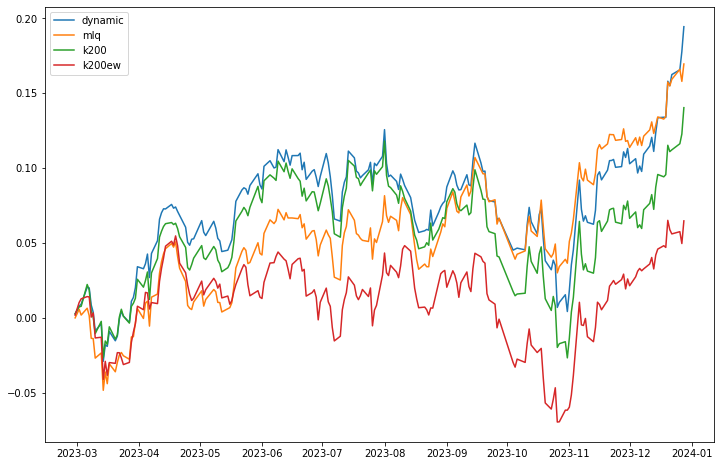

In [69]:
cum_ret_fig


In [70]:
ret_item_table


,dynamic,mlq
cum return(%),19.44,16.95
cagr(%),24.27,21.11
vol(te),0.14,0.14
sharpe(ir),1.68,1.53
mdd(%),-10.78,-6.96
turnover(%),0,0
start date,2023-02-28 00:00:00,2023-02-28 00:00:00
end date,2023-12-28 00:00:00,2023-12-28 00:00:00


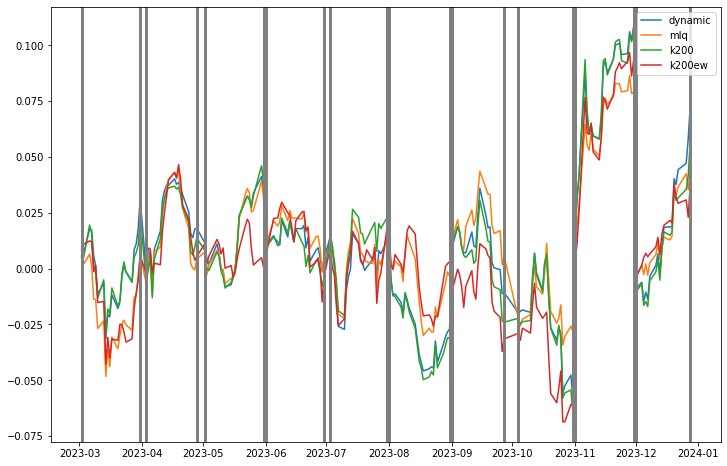

In [71]:
monthly_cumret_fig


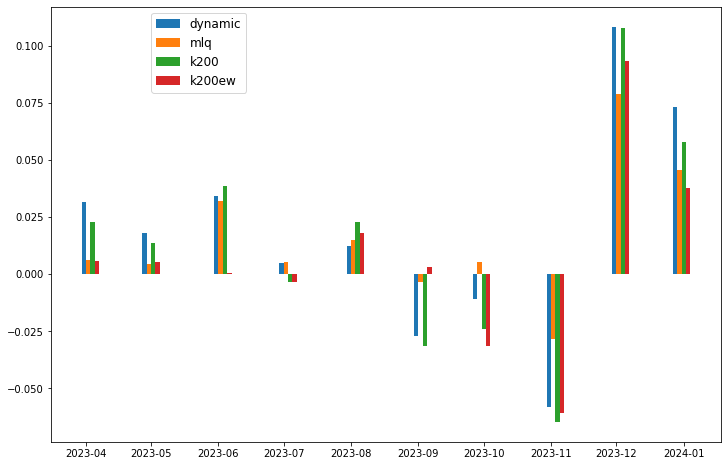

In [83]:
monthly_ret_fig

# excess_return

In [56]:
ret_excess=ret.subtract(bm_ret['코스피 200'], axis=0).dropna(how='all')

In [58]:
mlq_ret_excess=daily_w*ret_excess.loc[daily_w.index]
mlq_idx_ret_excess=mlq_ret_excess.sum(1)

In [59]:
final_ret=pd.concat([model_ret['dynamic'], idx_ret_cost, bm_ret], axis=1).dropna()
final_ret.columns=['dynamic', 'mlq', 'k200', 'k200ew'] # 'mfm', 'mfm_emp', 
k200_ret_excess=final_ret[['dynamic', 'mlq']].subtract(final_ret['k200'], axis=0) # 'mfm', 'mfm_emp', 
k200ew_ret_excess=final_ret[['dynamic', 'mlq']].subtract(final_ret['k200ew'], axis=0) # 'mfm', 'mfm_emp', 

In [60]:
final_cumret=((1+k200_ret_excess).cumprod()-1)
final_cumret_ew=((1+k200ew_ret_excess).cumprod()-1)


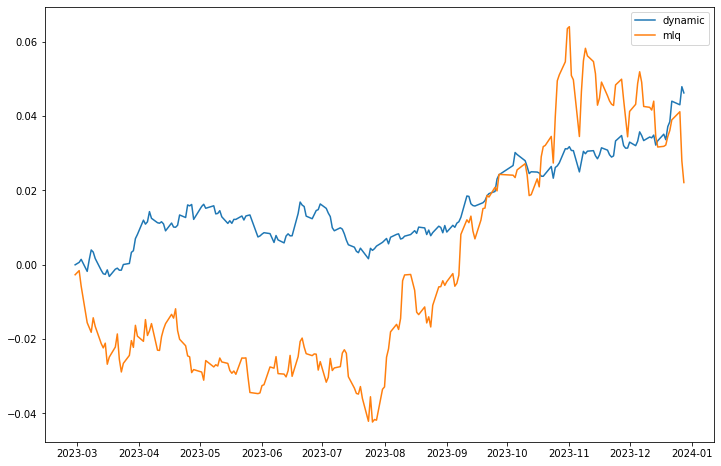

In [61]:
fig, ax1=plt.subplots(figsize=(12, 8))

for col in k200_ret_excess.columns:
    # final_value = final_cumret[col].iloc[-12]
    plt.plot(k200_ret_excess.index, final_cumret[col], label=col)
    # plt.text(final_cumret.index[-12], final_value, col, fontsize=14, va='bottom')

plt.legend()

In [62]:
temp_perf2 = perf.analyze_performance(final_ret['dynamic'], 
                                     model_name = 'dynamic',
                                     bm_return=final_ret['k200'])

temp_perf3 = perf.analyze_performance(final_ret['mlq'],
                                     # weights = daily_w,
                                     model_name = 'mlq',
                                     bm_return=final_ret['k200'])

In [63]:
pd.concat([temp_perf2, temp_perf3]).T

,dynamic,mlq
cum return(%),4.62,2.21
cagr(%),5.68,2.71
vol(te),0.03,0.07
sharpe(ir),2.02,0.4
mdd(%),-1.5,-4.08
turnover(%),0,0
start date,2023-02-28 00:00:00,2023-02-28 00:00:00
end date,2023-12-28 00:00:00,2023-12-28 00:00:00


2023-03-31 00:00:00
2023-04-28 00:00:00
2023-05-31 00:00:00
2023-06-30 00:00:00
2023-07-31 00:00:00
2023-08-31 00:00:00
2023-09-27 00:00:00
2023-10-31 00:00:00
2023-11-30 00:00:00
2023-12-28 00:00:00


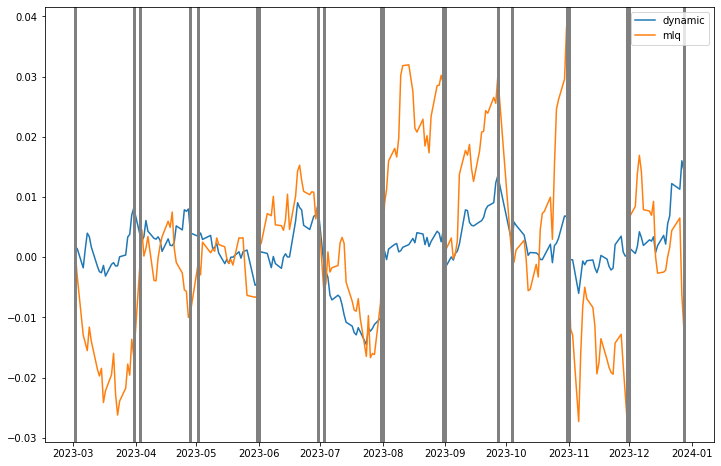

In [64]:
cumret_ls=[]
lastret_ls=[]
bm_ls=[]
init_ls=[]
end_ls=[]

temp_eom=k200_ret_excess.index+pd.offsets.MonthEnd(0)
temp_eom=temp_eom.unique()
for idx in temp_eom[1:]:
    
    temp_df = k200_ret_excess.loc[k200_ret_excess.index.to_period('M')==idx.to_period('M')]
    temp_cum_ret=(1+temp_df).cumprod()-1
    
    temp_bm=bm_ret.loc[bm_ret.index.to_period('M')==idx.to_period('M')]           
    temp_bm_ret=(1+temp_bm).cumprod()-1
    
    if temp_cum_ret.index[-1] not in init_ls:
        init_ls.append(temp_cum_ret.index[-1])
        end_ls.append(temp_cum_ret.index[0])
        
        bm_ls.append(temp_bm_ret)
        cumret_ls.append(temp_cum_ret)
        lastret_ls.append(temp_cum_ret.iloc[-1])
                

bm_ret_m=pd.concat(bm_ls) #.sort_index()
ret_m=pd.concat(cumret_ls) #.sort_index()

# ret_bm_m=pd.concat([ret_m, bm_ret_m], axis=1).dropna()
# ret_bm_m.columns=['dynamic', 'mlq', 'k200', 'k200ew'] # 'mfm', 'mfm_emp', 


fig, ax1=plt.subplots(figsize=(12, 8))

for col in ret_m.columns:
    plt.plot(ret_m.index, ret_m.loc[:, col], label=col)
    # plt.plot(ret_bm_m.index, ret_bm_m.iloc[:, -1], linewidth=2.5, linestyle='--')

for j, vl in enumerate(end_ls):
    print(vl)
    plt.axvline(x=vl, color='gray', linestyle='-', linewidth=3)
    plt.axvline(x=end_ls[j], color='gray', linestyle='-', linewidth=3)
    
# for col in ret_bm_m.columns:
    # final_value = ret_bm_m[col].iloc[-12]
    # plt.text(temp_cum_ret.index[-12], final_value, col, fontsize=14, va='bottom')
    # plt.text(1, y[i], str(txt), ha='center', va='bottom', fontsize=10, loc='best')

plt.legend()
plt.show()

In [65]:
month_endret.index.name='Dates'

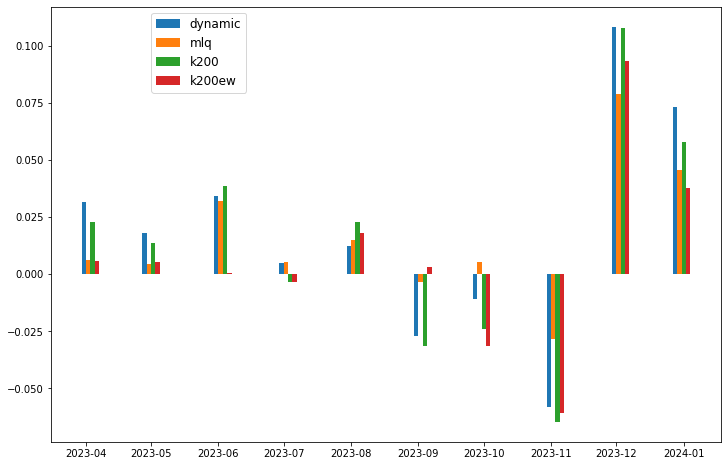

In [76]:
# plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize = (12, 8))

for i, col in enumerate(month_endret.columns):
    plt.bar(month_endret.index + pd.DateOffset(days=i*2), month_endret[col], 2)
    
ax.legend(labels = month_endret.columns,
      fontsize = 12,
      title_fontsize = 18)
ax.legend_.set_bbox_to_anchor([0.3, 1])
    

In [87]:
prc

Symbol,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A453340,A456040,A457190,A900030,A900050,A900140,A950010,A950070,A950100,A950210
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-02,NaN,9500.0,NaN,561.0,10900.0,48400.0,67000.0,24400.0,NaN,56400.0,...,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,NaN,NaN,7180.0
2023-01-03,NaN,9200.0,NaN,553.0,10600.0,47050.0,67100.0,24100.0,NaN,55600.0,...,NaN,NaN,NaN,NaN,NaN,1798.0,NaN,NaN,NaN,7180.0
2023-01-04,NaN,9330.0,NaN,551.0,10600.0,48500.0,68600.0,24150.0,NaN,55200.0,...,NaN,NaN,NaN,NaN,NaN,1795.0,NaN,NaN,NaN,7270.0
2023-01-05,NaN,9350.0,NaN,549.0,10550.0,46750.0,70000.0,24100.0,NaN,54800.0,...,NaN,NaN,NaN,NaN,NaN,1785.0,NaN,NaN,NaN,7250.0
2023-01-06,NaN,9410.0,NaN,549.0,10650.0,45600.0,69300.0,24250.0,NaN,54700.0,...,NaN,NaN,NaN,NaN,NaN,1791.0,NaN,NaN,NaN,7170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,NaN,9730.0,NaN,363.0,8740.0,NaN,70300.0,23300.0,NaN,62497.0,...,11430.0,109000.0,170900.0,NaN,NaN,2650.0,NaN,NaN,NaN,9360.0
2023-12-22,NaN,9920.0,NaN,356.0,8920.0,NaN,70000.0,23150.0,NaN,65752.0,...,11460.0,108500.0,167000.0,NaN,NaN,2620.0,NaN,NaN,NaN,9360.0
2023-12-26,NaN,9960.0,NaN,342.0,8830.0,NaN,70000.0,23350.0,NaN,66900.0,...,11490.0,108400.0,157000.0,NaN,NaN,2545.0,NaN,NaN,NaN,9270.0


In [86]:
mlq_w[mlq_w.index=='2023-12-28']

code,A000080,A000120,A000150,A000210,A000240,A000270,A000660,A000670,A000720,A000810,...,A323410,A326030,A329180,A336260,A352820,A373220,A375500,A381970,A383220,A402340
new_dates,,,,,,,,,,,,,,,,,,,,,
2023-12-28,0.0,0.009257,0.009257,0.009257,0.0,0.0,0.0,0.0,0.009257,0.0,...,0.0,0.0,0.0,0.0,0.0,0.009257,0.0,0.0,0.009257,0.0
